In [2]:
from fugue_notebook import setup
import pandas as pd
import seaborn as sns
from typing import List, Any, Dict, Tuple, Iterable
import matplotlib.pyplot as plt
setup()

<IPython.core.display.Javascript object>

In [3]:

df_insurance = pd.read_csv("insurance.csv")
df_insurance[df_insurance['sex'] == 'male'].sort_values("charges", ascending=False).head(10)

,age,sex,bmi,children,smoker,region,charges
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
530,57,male,42.130,1,yes,southeast,48675.51770
901,60,male,40.920,0,yes,southeast,48673.55880
281,54,male,40.565,3,yes,northeast,48549.17835
39,60,male,39.900,0,yes,southwest,48173.36100


In [4]:
%%fsql
SELECT  * FROM df_insurance
WHERE sex = 'male'
ORDER BY charges DESC
LIMIT 5
PRINT 3 ROWS


C:\Users\RAZER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
1146,60,male,32.800,0,yes,southwest,52590.82939


In [5]:
%%fsql
SELECT AVG(bmi) AS bmi_avs
FROM df_insurance

PRINT

,bmi_avs:double
0,30.663397


In [6]:
%%fsql
SELECT sex, COUNT(*) AS cnt
FROM df_insurance
GROUP BY sex
PRINT


,sex:str,cnt:long
0,female,662
1,male,676


ĐỌC/ GHI TẬP TIN BẰNG THƯ VIỆN FUGUESQL

In [7]:
df_iris = sns.load_dataset("iris")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
%%fsql
SELECT * FROM df_iris
SAVE OVERWRITE "iris.json" 

In [9]:
%%fsql
SELECT * FROM df_iris
SAVE OVERWRITE "iris.csv" (header=true)

In [10]:
%%fsql
SELECT * FROM df_iris
SAVE OVERWRITE "iris.parquet" 

In [11]:
%%fsql
LOAD 'iris.csv' (header = TRUE)
PRINT 

,sepal_length:str,sepal_width:str,petal_length:str,petal_width:str,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
%%fsql
LOAD 'iris.csv' (header = TRUE, infer_schema = TRUE)
PRINT 

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [13]:
%%fsql
LOAD 'iris.json' 
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [14]:
%%fsql
LOAD 'iris.parquet' 
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [15]:
df_tips = sns.load_dataset("tips")
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:

df_tips['smoker'] =df_tips['smoker'].astype(str)
df_tips['sex'] =df_tips['sex'].astype(str)
df_tips['time'] =df_tips['time'].astype(str)
df_tips['time'] =df_tips['time'].astype(str)

df_tips['day'] =df_tips['day'].astype(str)


In [17]:
%%fsql
SELECT *
FROM df_tips
WHERE sex = 'Female' AND smoker = 'Yes'
PRINT 5 ROWS


,total_bill:double,tip:double,sex:str,smoker:str,day:str,time:str,size:long
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2


In [18]:
%%fsql
SELECT * 
FROM df_tips
SAVE OVERWRITE "tips.csv" (header=true)

In [19]:
%%fsql
LOAD 'tips.csv' (header = TRUE, infer_schema = TRUE)
PRINT 10 ROWS



,total_bill:double,tip:double,sex:str,smoker:str,day:str,time:str,size:long
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [20]:
gioi_tinh = 'Female'
hut_thuoc = 'Yes'   

In [21]:

%%fsql
LOAD 'tips.csv' (header = TRUE, infer_schema = TRUE)
SELECT total_bill , tip 
WHERE sex = '{{gioi_tinh}}' AND smoker = '{{hut_thuoc}}'
PRINT 10 ROWS

,total_bill:double,tip:double
67,3.07,1.00
72,26.86,3.14
73,25.28,5.00
92,5.75,1.00
93,16.32,4.30
100,11.35,2.50
101,15.38,3.00
102,44.30,2.50
103,22.42,3.48
109,14.31,4.00


Biến toàn cục

In [22]:
%%fsql
LOAD 'tips.csv' (header = TRUE, infer_schema = TRUE)
sql1 =  SELECT * WHERE sex = '{{gioi_tinh}}' 
# sql2 = SELECT * WHERE smoker = '{{hut_thuoc}}'
YIELD DATAFRAME AS df1
#khởi tạo biến cục bộ df1 là sql1 là bây giờ những cell code khác đều dc dùng 


In [23]:
%%fsql
#truy vấn từ sql1
sql2 = SELECT * FROM df1 WHERE smoker = '{{hut_thuoc}}'
PRINT 10 ROWS

,total_bill:double,tip:double,sex:str,smoker:str,day:str,time:str,size:long
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2


In [24]:
def create_data_1 (n:List[int], m:List[Any]) -> List[List[Any]]:
    list_data = []
    for i in range(max(len(n), len(m))):
        list_temp = [n[i], m[i]]
        list_data.append(list_temp)
    return list_data

In [25]:
%%fsql
CREATE USING create_data_1(n=[1,2], m=['Hello','Python'])
SCHEMA col_1:int, col_2:str
YIELD DATAFRAME AS df

In [26]:
def plotter(df:pd.DataFrame, x_col:str, y_col:str, title:str, x_title:str, y_title:str) -> None:
    plt.figure(figsize=(8,6))
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.ylabel(y_title, fontsize=10)
    plt.xlabel(x_title, fontsize=10)
    plt.title(title, fontsize=14, color='blue')
    plt.show()

,ObservationDate:datetime,State:null,Country:str,Confirmed:int,Deaths:int,Recovered:int
192632,2021-01-01,None,Vietnam,1474,35,1325
193395,2021-01-02,None,Vietnam,1482,35,1337
194158,2021-01-03,None,Vietnam,1494,35,1339
194922,2021-01-04,None,Vietnam,1497,35,1339
195686,2021-01-05,None,Vietnam,1504,35,1339
196450,2021-01-06,None,Vietnam,1505,35,1353
197214,2021-01-07,None,Vietnam,1509,35,1353
197978,2021-01-08,None,Vietnam,1512,35,1357
198742,2021-01-09,None,Vietnam,1513,35,1361
199506,2021-01-10,None,Vietnam,1514,35,1361


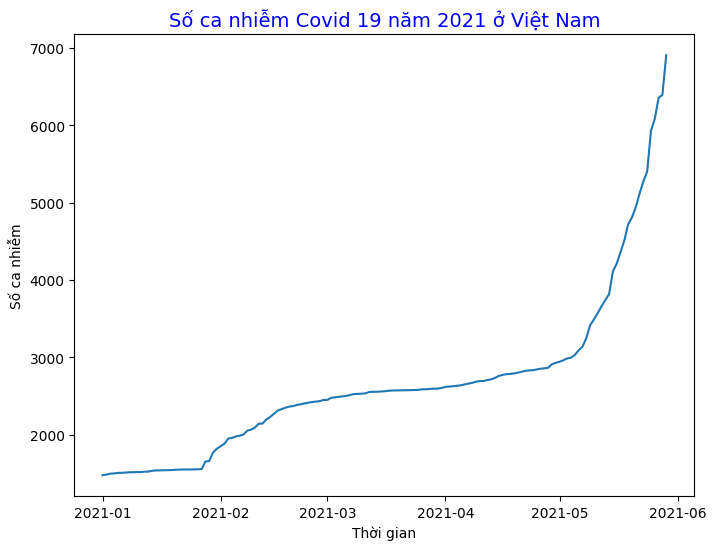

In [27]:
%%fsql
LOAD 'covid_19_data.parquet' 
SELECT *
WHERE Country = 'Vietnam' AND ObservationDate >=  '2021-01-01'
PRINT 10 ROWS
OUTPUT USING plotter(x_col='ObservationDate', y_col='Confirmed', title='Số ca nhiễm Covid 19 năm 2021 ở Việt Nam', x_title='Thời gian', y_title='Số ca nhiễm')

Cách gán kiểu dữ liệu vào bảng cách 1

In [28]:
# schema: col_1:int, col_2:str
def create_data_2 (n:List[int], m:List[Any]) -> List[List[Any]]:
    list_data = []
    for i in range(max(len(n), len(m))):
        list_temp = [n[i], m[i]]
        list_data.append(list_temp)
    return list_data

In [29]:
%%fsql
CREATE USING create_data_2(n=[1,2], m=['Hello','Python'])
PRINT

,col_1:int,col_2:str
0,1,Hello
1,2,Python


##### TRANSFORMER


In [40]:
# schema: *, gender:int
def make_gender (data:Iterable[Dict[str, Any]]) -> Iterable[Dict[str, Any]]:
    for row in data:
        row['gender'] = 1 if row['sex'] == 'male' else 0
        yield row

In [31]:
%%fsql
SELECT * FROM df_insurance
TRANSFORM USING make_gender
YIELD DATAFRAME AS df_insurance_2
PRINT 5 ROWS

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double,gender:int
0,19,female,27.9,0,yes,southwest,16884.924,0
1,18,male,33.77,1,no,southeast,1725.5523,1
2,28,male,33.0,3,no,southeast,4449.462,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.88,0,no,northwest,3866.8552,1


In [32]:
df_insurance_3 = df_insurance_2.as_pandas()


In [33]:
%%fsql
SELECT *
FROM df_insurance_2
PRINT 5 ROWS


,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double,gender:int
0,19,female,27.9,0,yes,southwest,16884.924,0
1,18,male,33.77,1,no,southeast,1725.5523,1
2,28,male,33.0,3,no,southeast,4449.462,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.88,0,no,northwest,3866.8552,1


In [34]:
df_insurance_3.head()

,age,sex,bmi,children,smoker,region,charges,gender
0,19,female,27.9,0,yes,southwest,16884.924,0
1,18,male,33.77,1,no,southeast,1725.5523,1
2,28,male,33.0,3,no,southeast,4449.462,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.88,0,no,northwest,3866.8552,1


PROCESSOR

In [35]:
def concat(df1:pd.DataFrame, df2:pd.DataFrame) -> pd.DataFrame:
    return pd.concat([df1, df2], axis=0).reset_index(drop=True) 


In [36]:
df_wine_white = pd.read_csv('winequality-white.csv', delimiter=';')
df_wine_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [37]:
print(df_wine_white.shape)
print(df_wine_red.shape)

(4898, 12)
(1599, 12)


In [38]:
%%fsql
PROCESS df_wine_red, df_wine_white USING concat
YIELD DATAFRAME AS df_wine

In [39]:
df_wine_2 = df_wine.as_pandas()
df_wine_2.shape

(6497, 12)